In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [8]:
import csv
import os

In [9]:
df = pd.read_csv("Churn_Modelling.csv").set_index("RowNumber")

In [10]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# We don't need the Surname Feature as it's a text data and not productive for our prediction.
# Similarly CustomerId won't help in predicting new data
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [15]:
# some columns have text data so let's one hot encode them
df1 = pd.get_dummies(prefix='Loc',data= df,columns=['Geography'])

In [16]:
# Replacing the Gender category into binary value
df2 = df1.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [17]:
df2.Gender.value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

In [18]:
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loc_France,Loc_Germany,Loc_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9997,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9998,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0


In [19]:
df2.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

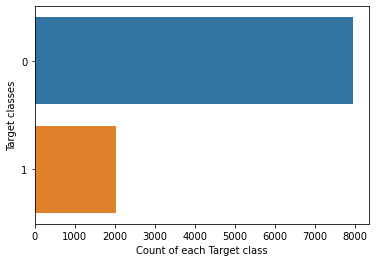

In [20]:
sns.countplot(y=df2.Exited ,data=df2)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

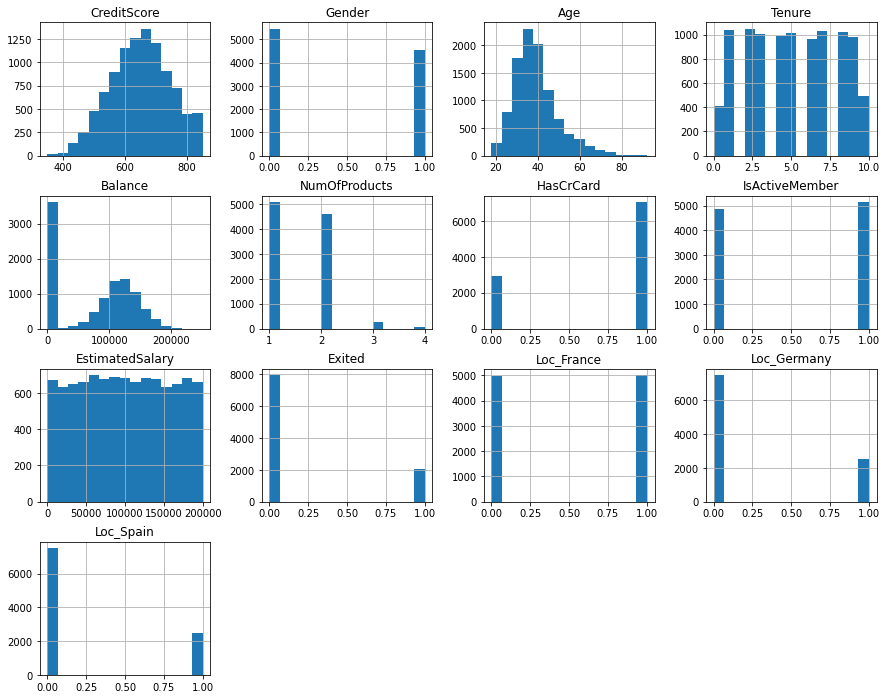

In [21]:
df2.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

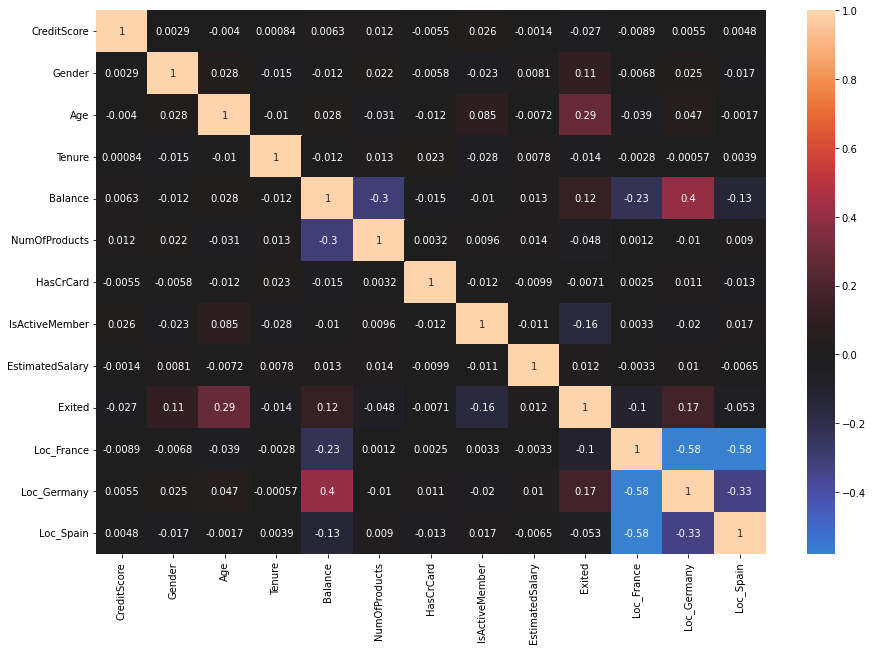

In [44]:
plt.figure(figsize=(15,10))
p=sns.heatmap(df2.corr(), annot=True,center=0)

In [23]:
len(df2.columns)

13

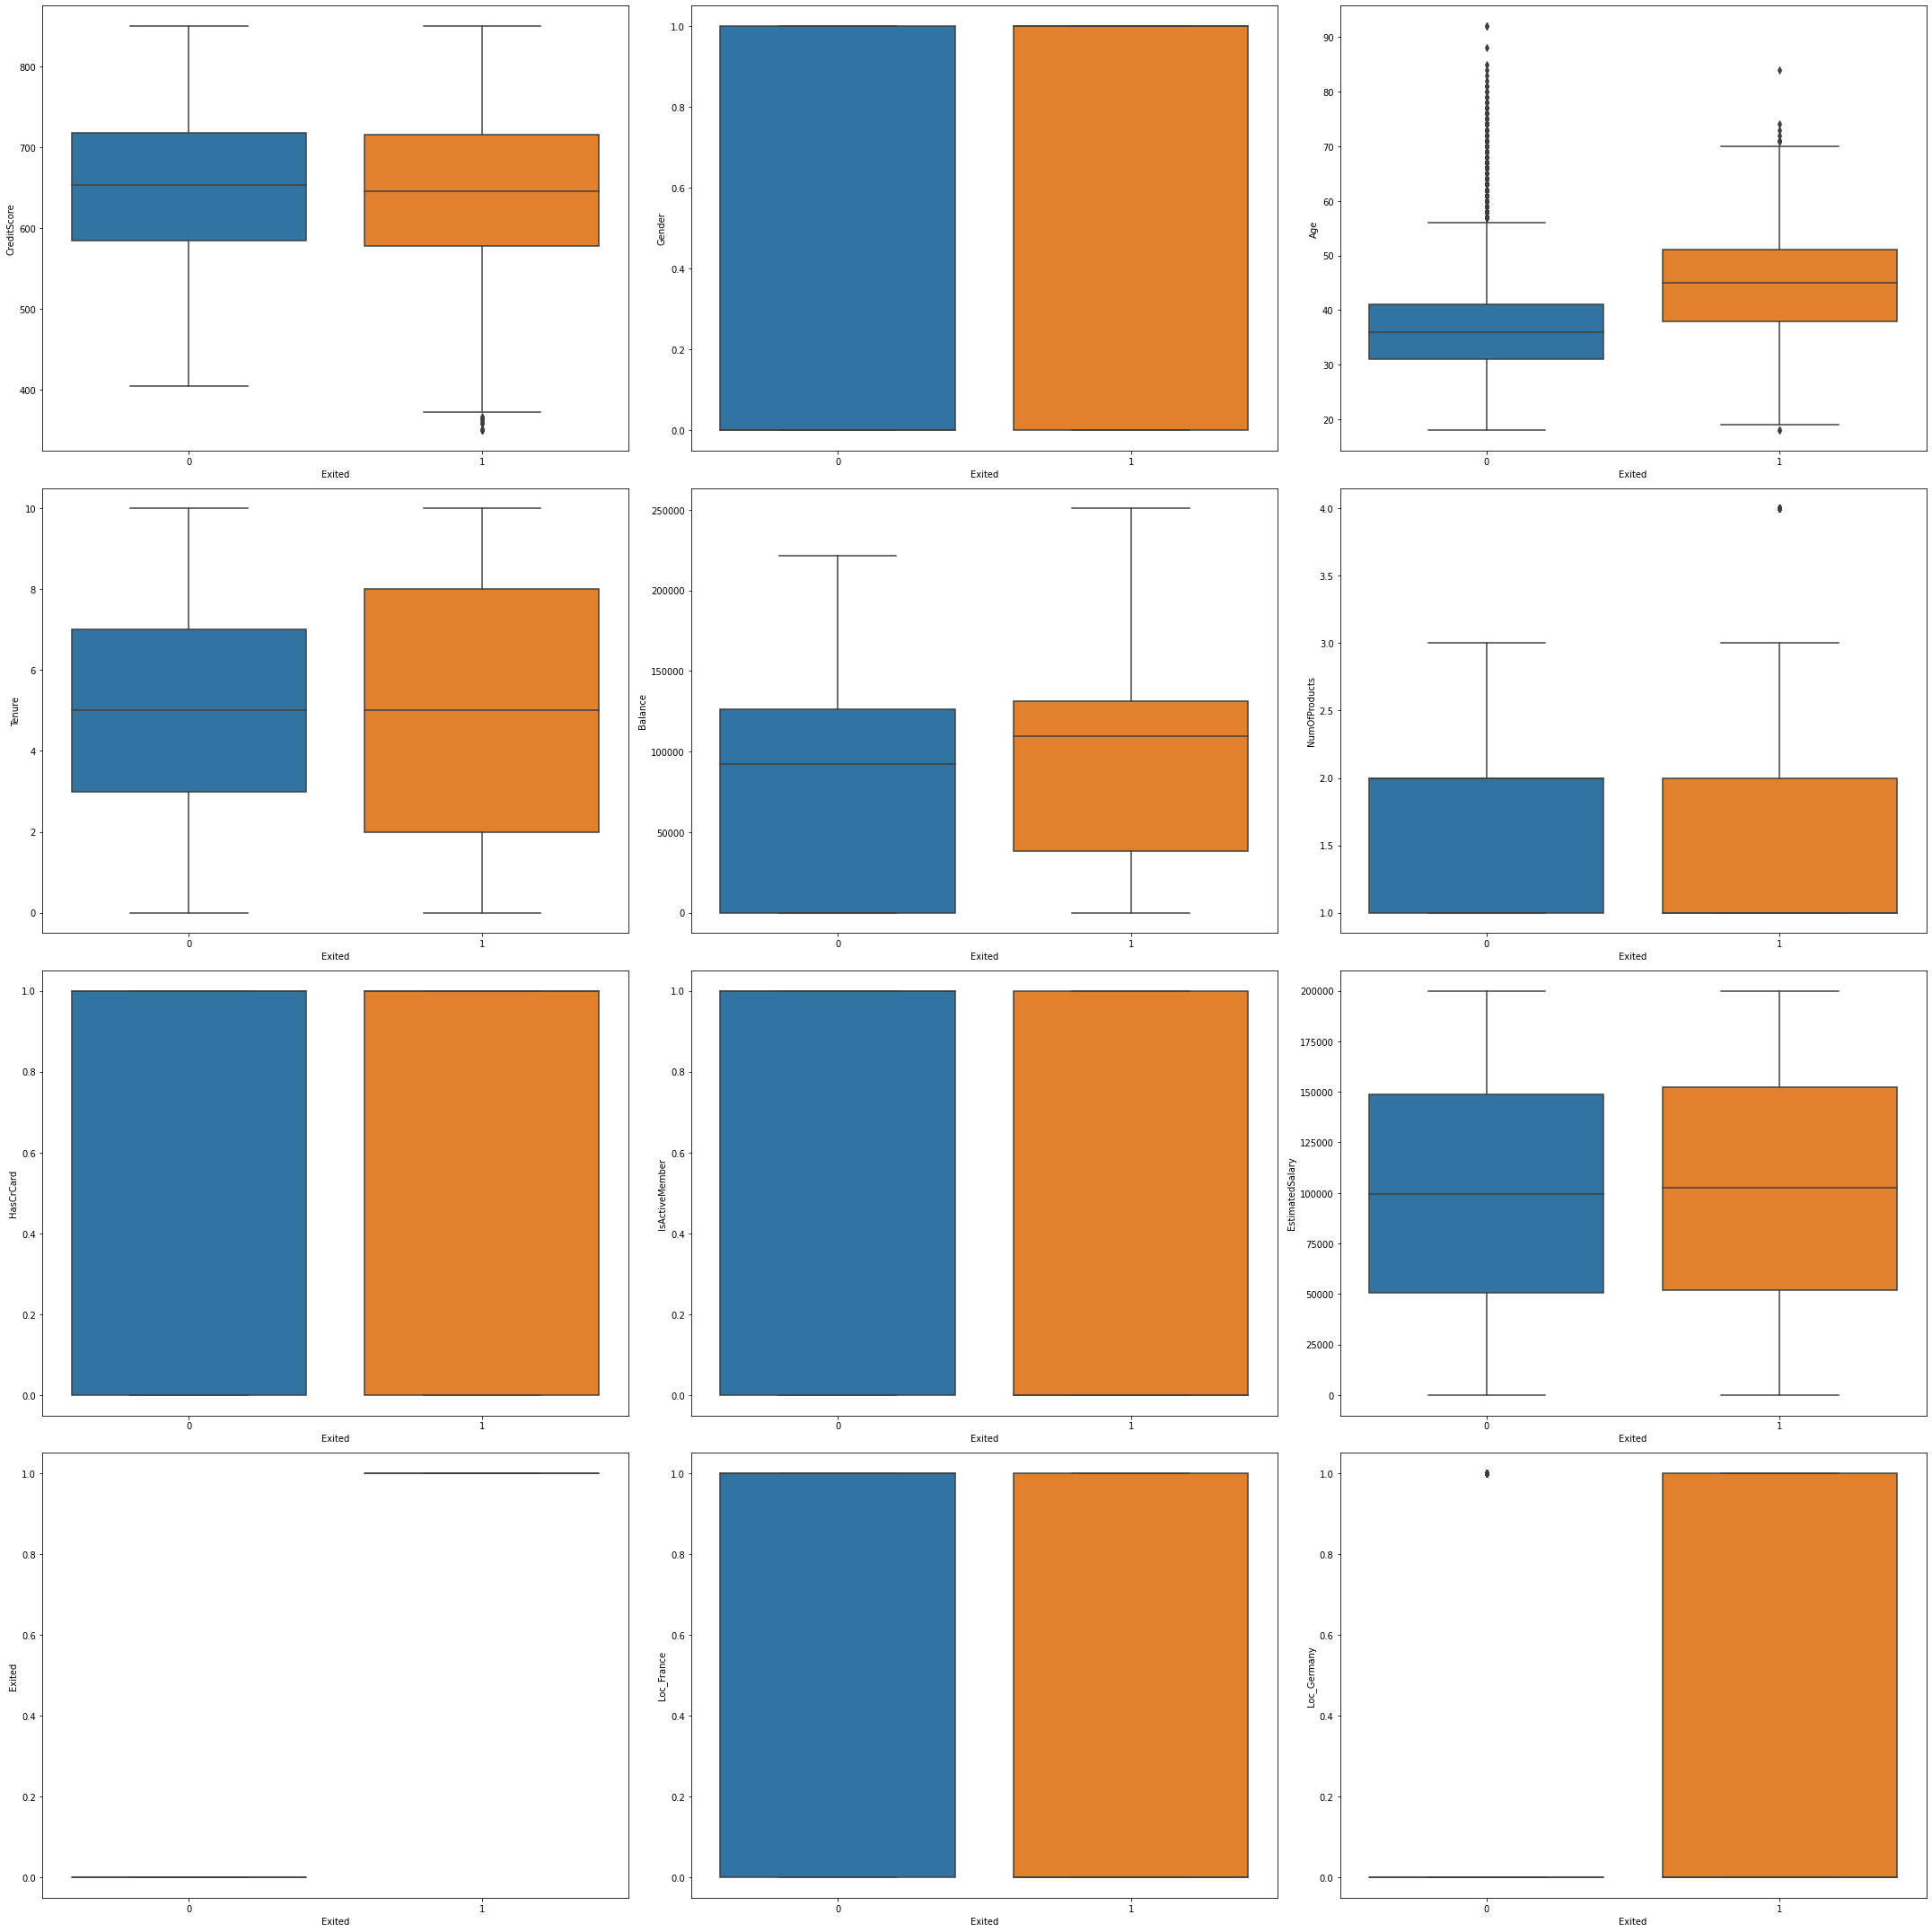

In [24]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df2.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df2['Exited'], y = df2[df2.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [25]:
X = df2.drop(['Exited'],axis=1)
y = df2.Exited

In [26]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loc_France,Loc_Germany,Loc_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-1.78451879, -0.92240378, -1.6140977 , ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       [ 1.47401668,  1.08412392,  0.20860091, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       [-0.82854466, -0.92240378, -0.65478264, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       ...,
       [ 0.89837634, -0.92240378, -0.36698812, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       [-0.62295883,  1.08412392, -0.07919361, ..., -1.01412966,
        -0.56953701,  1.74105933],
       [-0.2837422 ,  1.08412392,  0.88012145, ..., -1.01412966,
         1.75581215, -0.57436296]])

In [30]:
from tensorflow.python.keras.models import Sequential

In [31]:
from tensorflow.python.keras.layers.core import Dense,Dropout,Activation

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()  # Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='uniform',activation ='relu',input_dim =12))
# Adding the second hidden layer
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
# Adding the third hidden layer
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

# Compiling the ANN or means applying SGD on the whole ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10,epochs=50,verbose=0)

score, acc = classifier.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


670/670 [==============================] - 1s 1ms/step - loss: 0.3929 - accuracy: 0.8382
Train score: 0.39285579323768616
Train accuracy: 0.8382089734077454
********************
330/330 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8439
Test score: 0.3986733853816986
Test accuracy: 0.8439394235610962


In [34]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 15.0, 'Predicted label')

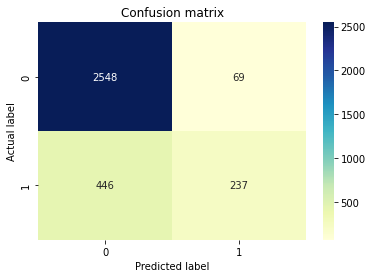

In [35]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [36]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100,verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


In [37]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.8471641838550568
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.017962606493769705


In [38]:
# logi reg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(C=10,random_state=10)

In [39]:
lr.fit(X_train,y_train)

LogisticRegression(C=10, random_state=10)

In [40]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
print('percentage accuracy',100*accuracy_score(y_test,y_pred))

percentage accuracy 80.75757575757576


In [42]:
# svm model
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2541,   76],
       [ 396,  287]])

In [43]:
# Accuracy
from sklearn.metrics import accuracy_score
print('Percentage accuracy:',100*accuracy_score(y_test,y_pred))

Percentage accuracy: 85.69696969696969
